In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in Data to DF

In [2]:
GameStats = pd.read_csv('GameStats_Final.csv')
PaceStats = pd.read_csv('PaceStats.csv')
PlayerStats = pd.read_csv('FSUPlayerStats4.5.csv')


### Create Columns for Offensive/Defensive Efficiency

In [3]:
# Offensive/Defensive Efficiency 

GameStats['Poss/Game'] = (GameStats['FGA']) - GameStats['OFF'] + GameStats['TO'] + (.4 * GameStats['FTA'])
GameStats['OE'] = (GameStats['PTS']/GameStats['Poss/Game']) * 100
GameStats['DE'] = (GameStats['PTs/A']/GameStats['Poss/Game']) * 100

GameStats['Margin Victory/Loss'] = GameStats['PTS'] - GameStats['PTs/A']
GameStats['OE/DE Margin'] = GameStats['OE'] - GameStats['DE']
Wins = GameStats.loc[GameStats['Win/Loss'] == 'W']
Losses = GameStats.loc[GameStats['Win/Loss'] == 'L']

## What was the Pace of Play for all of FSU's Opponents?

### Description of Pace for all Teams

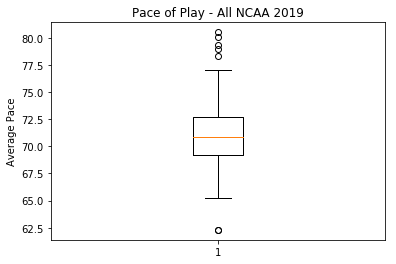

count    353.000000
mean      71.084703
std        2.767074
min       62.300000
25%       69.200000
50%       70.900000
75%       72.700000
max       80.500000
Name: 2019, dtype: float64

In [4]:
plt.boxplot(PaceStats['2019'])
plt.title('Pace of Play - All NCAA 2019')
plt.ylabel('Average Pace')
plt.show()

PaceStats['2019'].describe()

### Description of Pace for FSU Opponents

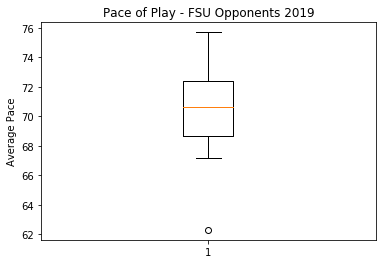

count    25.000000
mean     70.412000
std       2.770878
min      62.300000
25%      68.700000
50%      70.600000
75%      72.400000
max      75.700000
Name: 2019, dtype: float64

In [5]:
plt.boxplot(PaceStats.loc[PaceStats['Team'].isin(GameStats['Opponent'])]['2019'])
plt.title('Pace of Play - FSU Opponents 2019')
plt.ylabel('Average Pace')
plt.show()

PaceStats.loc[PaceStats['Team'].isin(GameStats['Opponent'])]['2019'].describe()

### List of Opponents and their Pace

In [6]:
print(PaceStats.loc[PaceStats['Team'].isin(GameStats['Opponent'])].to_string(index = False))

 Rank           Team  2019  Last 3  Last 1  Home  Away  2018
   24           Duke  75.7    70.3    71.6  74.4  77.4  74.9
   39     W Carolina  74.2    70.5    75.2  74.2  74.2  73.5
   60    Wake Forest  73.6    71.9    69.8  75.4  72.1  70.9
   64     N Carolina  73.3    72.5    71.6  74.4  72.3  77.6
   86       NC State  72.8    72.0    69.8  72.3  73.4  74.1
   89        GA Tech  72.7    72.3    70.4  73.2  72.2  70.2
   98     Miami (FL)  72.4    67.8    70.1  72.2  72.5  70.2
  130   St Fran (PA)  71.8    70.0    71.4  70.9  72.7  71.9
  134  North Alabama  71.8    69.0    65.9  71.0  72.3  72.2
  166     Boston Col  71.1    71.6    78.9  71.2  71.0  71.1
  193     Notre Dame  70.7    68.9    67.0  71.1  70.2  67.9
  200       Syracuse  70.6    70.5    70.1  69.5  72.2  69.4
  201      N Florida  70.6    69.4    64.9  69.5  71.4  75.2
  211     Chicago St  70.4    63.9    63.7  68.8  71.6  72.8
  225        Indiana  70.0    65.1    61.9  71.3  68.0    71
  240    Chattanooga  69

## Did FSU Play better against Faster or Slower teams?

### Pace of Play in Losses

In [7]:
PaceStats.loc[PaceStats['Team'].isin(Losses['Opponent'])]['2019'].describe()

count     5.000000
mean     68.920000
std       4.797082
min      62.300000
25%      67.900000
50%      68.700000
75%      70.000000
max      75.700000
Name: 2019, dtype: float64

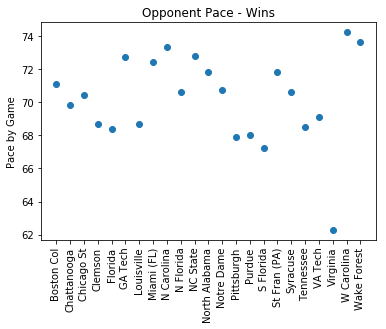

 Rank        Team  2019  Last 3  Last 1  Home  Away  2018
   24        Duke  75.7    70.3    71.6  74.4  77.4  74.9
  225     Indiana  70.0    65.1    61.9  71.3  68.0    71
  281     Clemson  68.7    69.1    70.4  69.4  67.8  68.7
  320  Pittsburgh  67.9    71.9    72.5  67.5  68.5    71
  352    Virginia  62.3    62.2    61.9  62.4  62.1  62.6


In [8]:
plt.scatter(PaceStats['Team'].loc[PaceStats['Team'].isin(Wins['Opponent'])],PaceStats['2019'].loc[PaceStats['Team'].isin(Wins['Opponent'])])
plt.xticks(rotation = 'vertical')
plt.title('Opponent Pace - Wins')
plt.ylabel('Pace by Game')
plt.show()

print(PaceStats.loc[PaceStats['Team'].isin(Losses['Opponent'])].to_string(index = False))

### Pace of Play in Wins

In [9]:
PaceStats.loc[PaceStats['Team'].isin(Wins['Opponent'])]['2019'].describe()

count    23.000000
mean     70.200000
std       2.655184
min      62.300000
25%      68.600000
50%      70.600000
75%      72.100000
max      74.200000
Name: 2019, dtype: float64

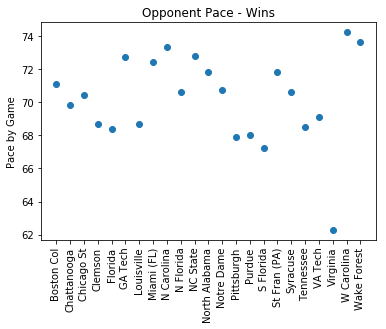

 Rank           Team  2019  Last 3  Last 1  Home  Away  2018
   39     W Carolina  74.2    70.5    75.2  74.2  74.2  73.5
   60    Wake Forest  73.6    71.9    69.8  75.4  72.1  70.9
   64     N Carolina  73.3    72.5    71.6  74.4  72.3  77.6
   86       NC State  72.8    72.0    69.8  72.3  73.4  74.1
   89        GA Tech  72.7    72.3    70.4  73.2  72.2  70.2
   98     Miami (FL)  72.4    67.8    70.1  72.2  72.5  70.2
  130   St Fran (PA)  71.8    70.0    71.4  70.9  72.7  71.9
  134  North Alabama  71.8    69.0    65.9  71.0  72.3  72.2
  166     Boston Col  71.1    71.6    78.9  71.2  71.0  71.1
  193     Notre Dame  70.7    68.9    67.0  71.1  70.2  67.9
  200       Syracuse  70.6    70.5    70.1  69.5  72.2  69.4
  201      N Florida  70.6    69.4    64.9  69.5  71.4  75.2
  211     Chicago St  70.4    63.9    63.7  68.8  71.6  72.8
  240    Chattanooga  69.8    67.8    63.1  70.0  69.6  70.6
  267        VA Tech  69.1    66.6    67.0  69.9  68.0    66
  281        Clemson  68

In [10]:
plt.scatter(PaceStats['Team'].loc[PaceStats['Team'].isin(Wins['Opponent'])],PaceStats['2019'].loc[PaceStats['Team'].isin(Wins['Opponent'])])
plt.xticks(rotation = 'vertical')
plt.title('Opponent Pace - Wins')
plt.ylabel('Pace by Game')
plt.show()

print(PaceStats.loc[PaceStats['Team'].isin(Wins['Opponent'])].to_string(index = False))

## How different was FSU's Offense in Wins vs. Losses?


**A Higher Offensive Efficiency is better: > 1 = Good; < 1 = Bad


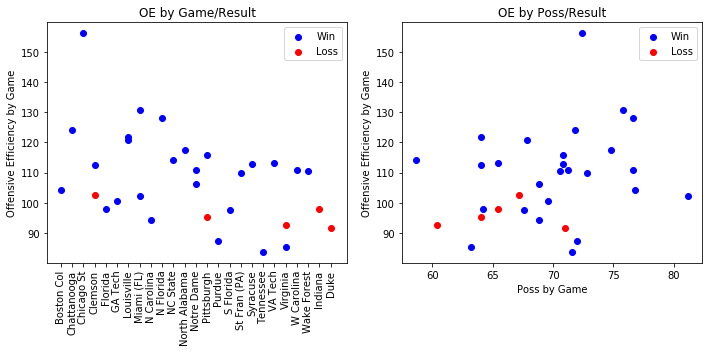

In [11]:
print('\n**A Higher Offensive Efficiency is better: > 1 = Good; < 1 = Bad')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Wins['Opponent'], Wins['OE'], color = 'blue', label = 'Win')
plt.scatter(Losses['Opponent'], Losses['OE'], color = 'red', label = 'Loss')
plt.xticks(rotation = 'vertical')
plt.title('OE by Game/Result')
plt.ylabel('Offensive Efficiency by Game')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(Wins['Poss/Game'], Wins['OE'], color = 'blue', label = 'Win')
plt.scatter(Losses['Poss/Game'], Losses['OE'], color = 'red', label = 'Loss')
plt.title('OE by Poss/Result')
plt.ylabel('Offensive Efficiency by Game')
plt.xlabel('Poss by Game')
plt.legend()

plt.tight_layout()
plt.show()

#### Offensive Efficency in Wins

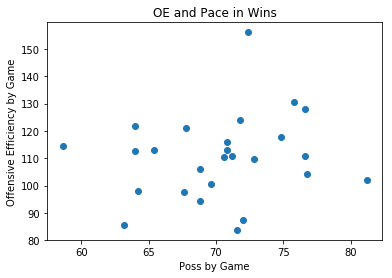


 Average Offensive Efficiency in Wins = 110.39150373231034

   Date       Opponent          OE  Poss/Game    PTS  Margin Victory/Loss
 11/10        Florida   98.130841       64.2   63.0                 12.0
 11/15     W Carolina  110.955056       71.2   79.0                  5.0
 11/20    Chattanooga  123.955432       71.8   89.0                 36.0
 11/23   St Fran (PA)  109.890110       72.8   80.0                 15.0
 11/25     Chicago St  156.077348       72.4  113.0                 57.0
 11/29      Tennessee   83.798883       71.6   60.0                  3.0
 11/30         Purdue   87.500000       72.0   63.0                  3.0
 12/08        Clemson  112.500000       64.0   72.0                 19.0
 12/17      N Florida  127.937337       76.6   98.0                 17.0
 12/21      S Florida   97.633136       67.6   66.0                  6.0
 12/28  North Alabama  117.647059       74.8   88.0                 17.0
 12/31        GA Tech  100.574713       69.6   70.0           

In [12]:
plt.scatter(Wins['Poss/Game'], Wins['OE'])
plt.xlabel('Poss by Game')
plt.ylabel('Offensive Efficiency by Game')
plt.title('OE and Pace in Wins')
plt.show()

print('\n Average Offensive Efficiency in Wins =', Wins['OE'].mean())

print('\n',Wins[['Date', 'Opponent','OE','Poss/Game', 'PTS', 'Margin Victory/Loss']].to_string(index = False))

#### Offensive Efficency in Losses

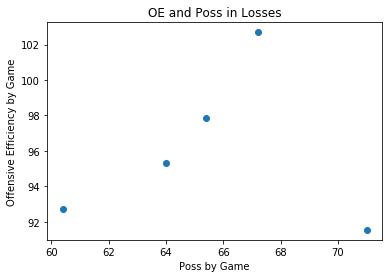


 Average Offensive Efficiency in Losses = 96.02298524168482

   Date    Opponent          OE  Poss/Game   PTS  Margin Victory/Loss
 11/06  Pittsburgh   95.312500       64.0  61.0                 -2.0
 12/03     Indiana   97.859327       65.4  64.0                -16.0
 01/28    Virginia   92.715232       60.4  56.0                 -5.0
 02/10        Duke   91.549296       71.0  65.0                 -5.0
 02/29     Clemson  102.678571       67.2  69.0                 -1.0


In [13]:
plt.scatter(Losses['Poss/Game'], Losses['OE'])
plt.xlabel('Poss by Game')
plt.ylabel('Offensive Efficiency by Game')
plt.title('OE and Poss in Losses')
plt.show()

print('\n Average Offensive Efficiency in Losses =', Losses['OE'].mean())

print('\n', Losses[['Date', 'Opponent','OE','Poss/Game', 'PTS', 'Margin Victory/Loss']].to_string(index = False))

### How different was FSU's Defense in Wins vs. Losses?


**A Lower Defensive Efficiency is better: < 1 = Good; > 1 = Bad


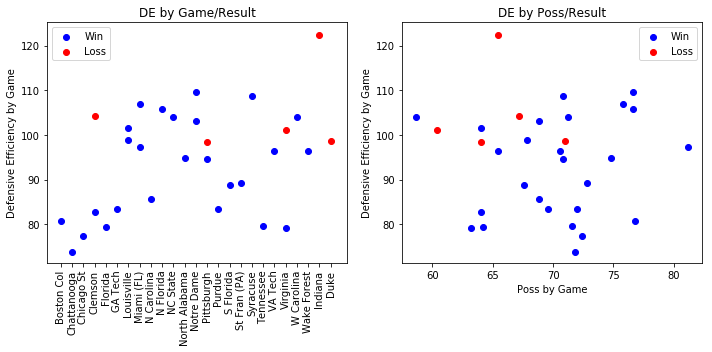

In [14]:
print('\n**A Lower Defensive Efficiency is better: < 1 = Good; > 1 = Bad')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Wins['Opponent'], Wins['DE'], color = 'blue', label = 'Win')
plt.scatter(Losses['Opponent'], Losses['DE'], color = 'red', label = 'Loss')
plt.xticks(rotation = 'vertical')
plt.title('DE by Game/Result')
plt.ylabel('Defensive Efficiency by Game')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(Wins['Poss/Game'], Wins['DE'], color = 'blue', label = 'Win')
plt.scatter(Losses['Poss/Game'], Losses['DE'], color = 'red', label = 'Loss')
plt.title('DE by Poss/Result')
plt.ylabel('Defensive Efficiency by Game')
plt.xlabel('Poss by Game')
plt.legend()

plt.tight_layout()
plt.show()

#### Defensive Efficiency in Wins

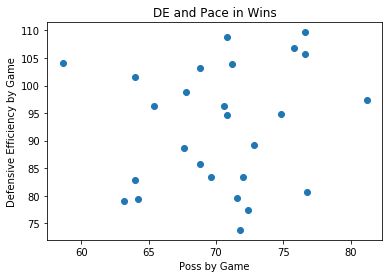

  Date       Opponent          DE  Poss/Game  PTs/A  Margin Victory/Loss
 11/10        Florida   79.439252       64.2   51.0                 12.0
 11/15     W Carolina  103.932584       71.2   74.0                  5.0
 11/20    Chattanooga   73.816156       71.8   53.0                 36.0
 11/23   St Fran (PA)   89.285714       72.8   65.0                 15.0
 11/25     Chicago St   77.348066       72.4   56.0                 57.0
 11/29      Tennessee   79.608939       71.6   57.0                  3.0
 11/30         Purdue   83.333333       72.0   60.0                  3.0
 12/08        Clemson   82.812500       64.0   53.0                 19.0
 12/17      N Florida  105.744125       76.6   81.0                 17.0
 12/21      S Florida   88.757396       67.6   60.0                  6.0
 12/28  North Alabama   94.919786       74.8   71.0                 17.0
 12/31        GA Tech   83.333333       69.6   58.0                 12.0
 01/04     Louisville  101.562500       64.0   65.0

In [15]:
plt.scatter(Wins['Poss/Game'], Wins['DE'])
plt.xlabel('Poss by Game')
plt.ylabel('Defensive Efficiency by Game')
plt.title('DE and Pace in Wins')
plt.show()

print(Wins[['Date', 'Opponent','DE','Poss/Game', 'PTs/A', 'Margin Victory/Loss']].to_string(index = False))

print('\n Average Defensive Efficiency in Wins =', Wins['DE'].mean())

#### Defensive Efficiency in Losses

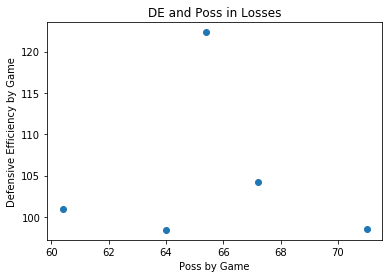

  Date    Opponent          DE  Poss/Game   PTS  Margin Victory/Loss
 11/06  Pittsburgh   98.437500       64.0  61.0                 -2.0
 12/03     Indiana  122.324159       65.4  64.0                -16.0
 01/28    Virginia  100.993377       60.4  56.0                 -5.0
 02/10        Duke   98.591549       71.0  65.0                 -5.0
 02/29     Clemson  104.166667       67.2  69.0                 -1.0

 Average Defensive Efficiency in Losses = 104.90265049345835


In [16]:
plt.scatter(Losses['Poss/Game'], Losses['DE'])
plt.xlabel('Poss by Game')
plt.ylabel('Defensive Efficiency by Game')
plt.title('DE and Poss in Losses')
plt.show()

print(Losses[['Date', 'Opponent','DE','Poss/Game', 'PTS', 'Margin Victory/Loss']].to_string(index = False))
print('\n Average Defensive Efficiency in Losses =', Losses['DE'].mean())

### Is there a Correlation betwenn Offensive Efficiency/Defensive Efficiency and Wins?

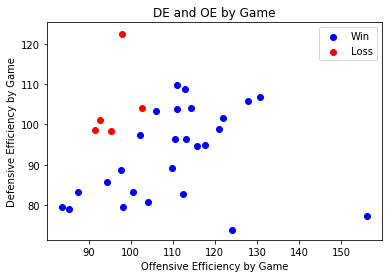

In [17]:
plt.scatter(Wins['OE'], Wins['DE'], color = 'blue', label = 'Win')
plt.scatter(Losses['OE'], Losses['DE'], color = 'red', label = 'Loss')
plt.title('DE and OE by Game')
plt.ylabel('Defensive Efficiency by Game')
plt.xlabel('Offensive Efficiency by Game')
plt.legend()
plt.show()

#### OE/DE Margin in Wins

In [18]:
print(Wins[['Date', 'Opponent', 'Result', 'OE', 'DE', 'OE/DE Margin', 'Margin Victory/Loss']].to_string(index = False))

  Date       Opponent  Result          OE          DE  OE/DE Margin  Margin Victory/Loss
 11/10        Florida   63-51   98.130841   79.439252     18.691589                 12.0
 11/15     W Carolina   79-74  110.955056  103.932584      7.022472                  5.0
 11/20    Chattanooga   89-53  123.955432   73.816156     50.139276                 36.0
 11/23   St Fran (PA)   80-65  109.890110   89.285714     20.604396                 15.0
 11/25     Chicago St  113-56  156.077348   77.348066     78.729282                 57.0
 11/29      Tennessee   60-57   83.798883   79.608939      4.189944                  3.0
 11/30         Purdue   63-60   87.500000   83.333333      4.166667                  3.0
 12/08        Clemson   72-53  112.500000   82.812500     29.687500                 19.0
 12/17      N Florida   98-81  127.937337  105.744125     22.193211                 17.0
 12/21      S Florida   66-60   97.633136   88.757396      8.875740                  6.0
 12/28  North Alabama

#### OE/DE Margin in Losses

In [19]:
print(Losses[['Date', 'Opponent', 'Result', 'OE', 'DE', 'OE/DE Margin', 'Margin Victory/Loss']].to_string(index = False))

  Date    Opponent Result          OE          DE  OE/DE Margin  Margin Victory/Loss
 11/06  Pittsburgh  61-63   95.312500   98.437500     -3.125000                 -2.0
 12/03     Indiana  64-80   97.859327  122.324159    -24.464832                -16.0
 01/28    Virginia  56-61   92.715232  100.993377     -8.278146                 -5.0
 02/10        Duke  65-70   91.549296   98.591549     -7.042254                 -5.0
 02/29     Clemson  69-70  102.678571  104.166667     -1.488095                 -1.0


## Player Stats Analysis

In [20]:
PlayerStats.fillna(0)
PlayerStats = PlayerStats.drop([18])

### Who played the most minutes for FSU this year?

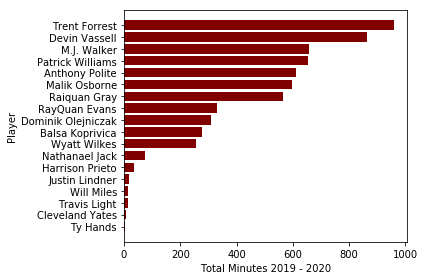

Top 10 Players by Minutes Played:

               Player   MP
0       Trent Forrest  959
1       Devin Vassell  863
2         M.J. Walker  656
3    Patrick Williams  653
4      Anthony Polite  612
5       Malik Osborne  598
6        Raiquan Gray  565
7       RayQuan Evans  332
8  Dominik Olejniczak  310
9     Balsa Koprivica  278


In [21]:
PlayerStats_MPG = PlayerStats.sort_values(['MP'], ascending = True).reset_index(drop = True)

Player_Count = PlayerStats_MPG['Player'].count()

plt.barh(PlayerStats_MPG.index , PlayerStats_MPG['MP'], color = 'maroon')
plt.yticks(np.arange(Player_Count), PlayerStats_MPG['Player'])
plt.ylabel('Player')
plt.xlabel('Total Minutes 2019 - 2020')
plt.tight_layout()
plt.show()

top10 = PlayerStats_MPG.nlargest(10 ,'MP').reset_index(drop = True)
print('Top 10 Players by Minutes Played:\n')
print(top10[['Player', 'MP']])

## Who had the most Offensive Possessions?

In [22]:
PlayerStats['Poss/Year'] = (PlayerStats['FGA']) - PlayerStats['ORB'] + PlayerStats['TOV'] + (.4 * PlayerStats['FTA'])
PlayerStats['Poss/Min'] = PlayerStats['Poss/Year'] / PlayerStats['MP']

In [23]:
PlayerStats_Poss = PlayerStats.sort_values(['Poss/Year'], ascending = True).reset_index(drop = True)
PlayerStats_Possp = PlayerStats.sort_values(['Poss/Min'], ascending = True).reset_index(drop = True)

top10_p = PlayerStats.loc[PlayerStats['MP'] > 150]
top10_p = top10_p.nlargest(10 ,'Poss/Min').sort_values(['Poss/Min'], ascending = True).reset_index(drop = True)

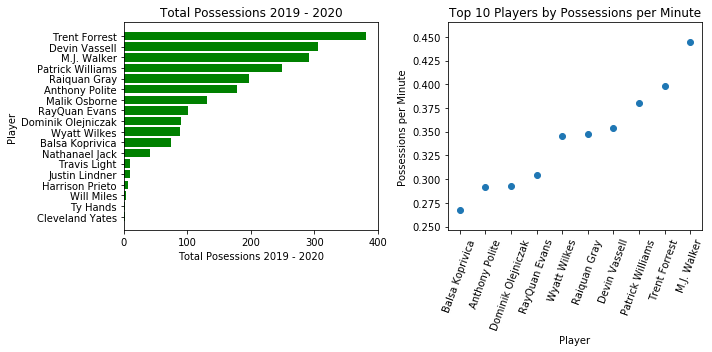

In [39]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.barh(PlayerStats_Poss.index , PlayerStats_Poss['Poss/Year'], color = 'green')
plt.yticks(np.arange(Player_Count), PlayerStats_Poss['Player'])
plt.ylabel('Player')
plt.xlabel('Total Posessions 2019 - 2020')
plt.title('Total Possessions 2019 - 2020')

plt.subplot(1,2,2)
plt.scatter(top10_p.index , top10_p['Poss/Min'])
plt.xticks(np.arange(10), top10_p['Player'], rotation = 70)
plt.ylabel('Possessions per Minute')
plt.xlabel('Player')
plt.title('Top 10 Players by Possessions per Minute')
plt.tight_layout()
plt.show()

### Who were the Leading Scorers?

In [40]:
PlayerStats['OE'] = (PlayerStats['PTS']/PlayerStats['Poss/Year']) * 100
PlayerStats['eFG%'] = ((PlayerStats['FG'] + .5) + PlayerStats['3P'])/ PlayerStats['FGA']

eligble = PlayerStats.loc[PlayerStats['MP'] > 150]
top10_pts = eligble.nlargest(10 ,'PTS').sort_values(['PTS'], ascending = True).reset_index(drop = True)

top10_OE = eligble.nlargest(10 ,'OE').sort_values(['OE'], ascending = True).reset_index(drop = True)
low = eligble.nsmallest(3, 'OE').sort_values(['OE'], ascending = True).reset_index(drop = True)
top10_eFG = eligble.nlargest(10 ,'eFG%').sort_values(['eFG%'], ascending = True).reset_index(drop = True)

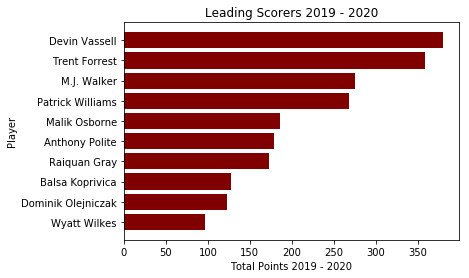

In [41]:
plt.barh(top10_pts.index , top10_pts['PTS'], color = 'maroon')
plt.yticks(np.arange(10), top10_pts['Player'])
plt.ylabel('Player')
plt.xlabel('Total Points 2019 - 2020')
plt.title('Leading Scorers 2019 - 2020')
plt.show()


### Who was the most efficient on Offense?

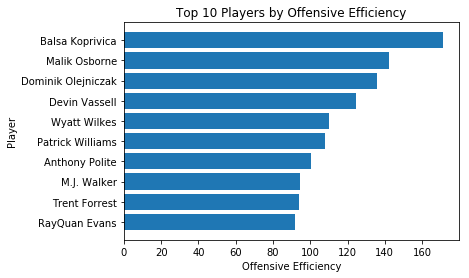

In [42]:
plt.barh(top10_OE.index , top10_OE['OE'])
plt.yticks(np.arange(10), top10_OE['Player'])
plt.xlabel('Offensive Efficiency')
plt.ylabel('Player')
plt.title('Top 10 Players by Offensive Efficiency')
plt.show()

### Defensive Stats

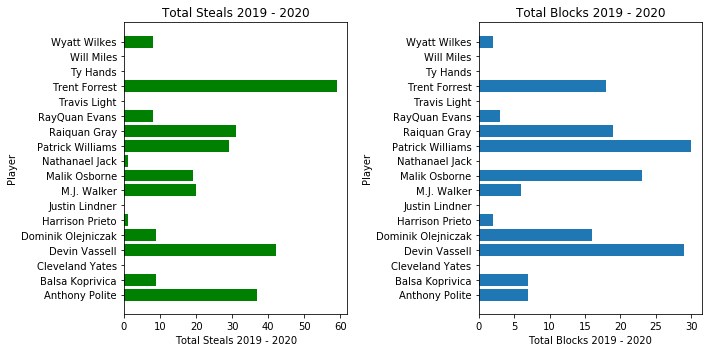

In [54]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.barh(PlayerStats['Player'] , PlayerStats['STL'], color = 'green')
plt.ylabel('Player')
plt.xlabel('Total Steals 2019 - 2020')
plt.title('Total Steals 2019 - 2020')

plt.subplot(1,2,2)
plt.barh(PlayerStats['Player'] , PlayerStats['BLK'])
plt.xlabel('Total Blocks 2019 - 2020')
plt.ylabel('Player')
plt.title('Total Blocks 2019 - 2020')
plt.tight_layout()
plt.show()